                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                 1461
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -8917.716
Date:                            Thu, 01 May 2025   AIC                          17845.432
Time:                                    13:45:32   BIC                          17871.773
Sample:                                01-01-2018   HQIC                         17855.267
                                     - 12-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3922      0.059      6.695      0.000       0.277       0.507
ma.L1         -0.6237      0.049   

<Figure size 1500x1500 with 0 Axes>

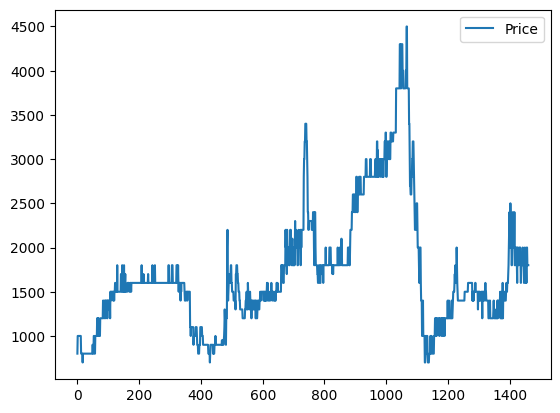

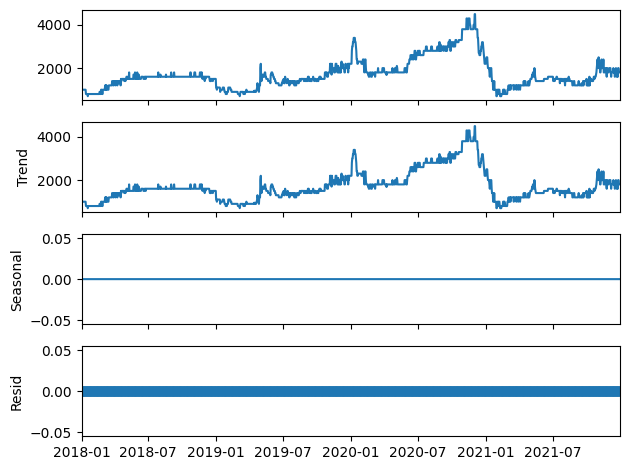

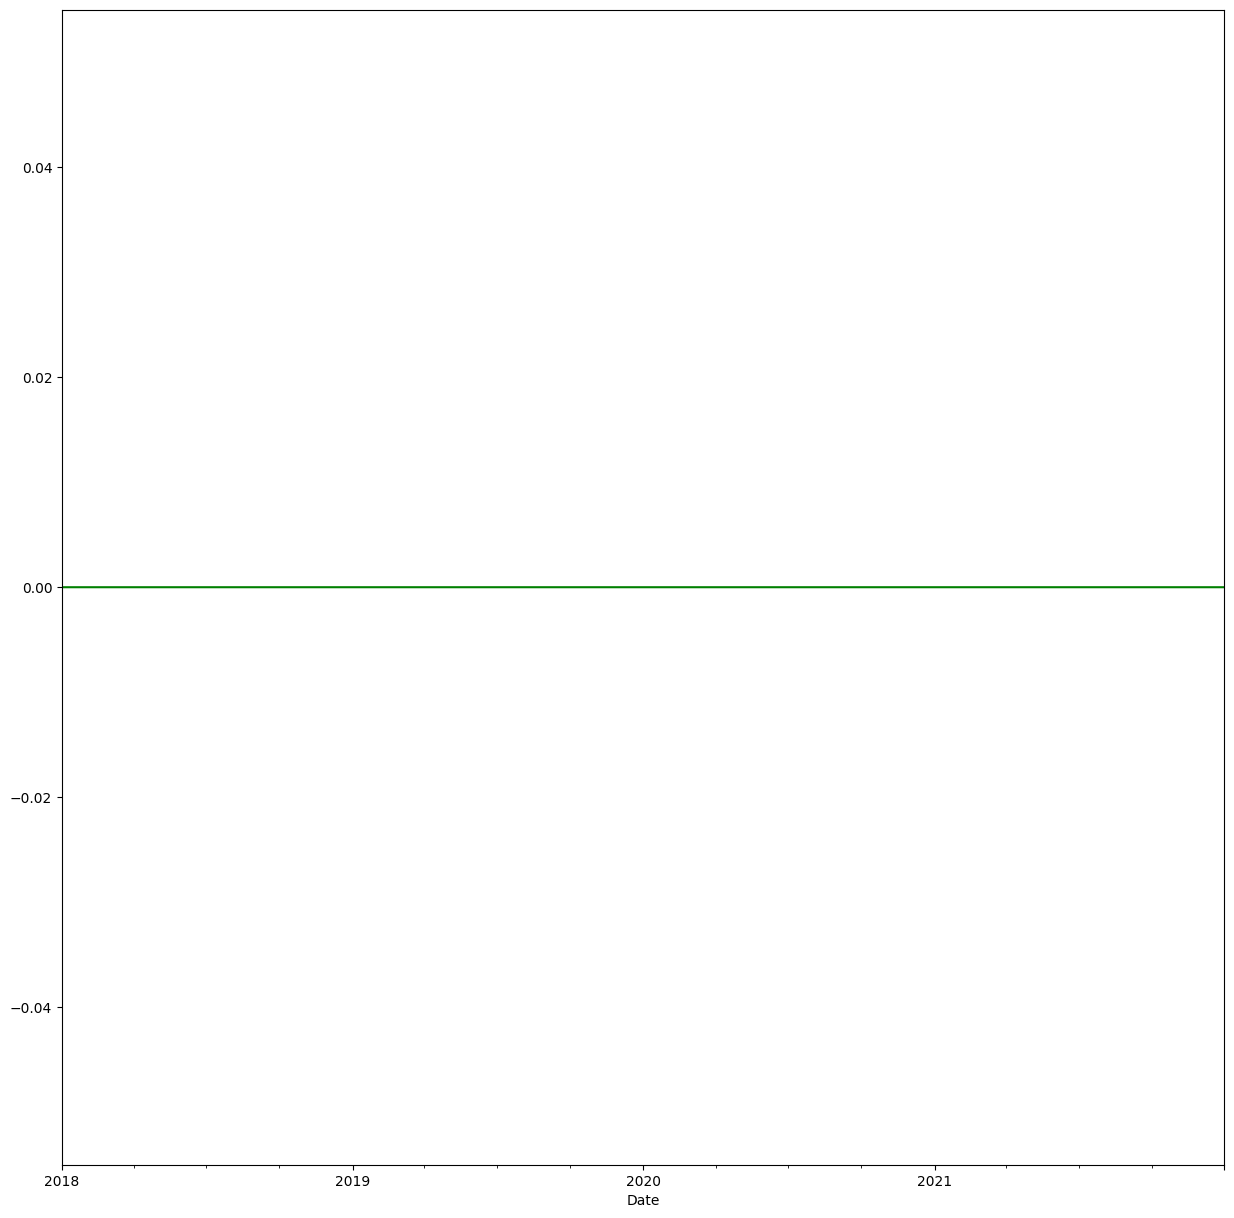

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#get_ipython().run_line_magic('matplotlib', 'inline')
data = pd.read_csv('/content/Sarima_Model.csv')
plt.figure(figsize=(15, 15))
data.plot()
data.index = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data = data.asfreq('D')
data.drop(columns='Date',inplace=True)
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(data, model='additive',period=1)
decompose_data.plot()
plt.figure(figsize=(15, 15))
seasonality=decompose_data.seasonal
seasonality.plot(color='green')
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(data,order=(1,1,1), seasonal_order=(1,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
results=mod.fit()
print(results.summary())